# Confusion matrix, false positive and false negative rate
Machine Learning with Imbalanced Data - Course

FPR = fp / (tn + fp)

FNR = fn / (tp + fn)

The confusion matrix, the FPR and the FNR depend on the probability threshold utilised to determine the class output.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix

## Load data

In [2]:
# load data
data = pd.read_csv('../datasets/kdd2004.csv')

# remap target class to 0 and 1
data['target'] = data['target'].map({-1: 0, 1: 1})

data.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,target
0,52.0,32.69,0.30,2.5,20.0,1256.8,-0.89,0.33,11.0,-55.0,...,1595.1,-1.64,2.83,-2.0,-50.0,445.2,-0.35,0.26,0.76,0
1,58.0,33.33,0.00,16.5,9.5,608.1,0.50,0.07,20.5,-52.5,...,762.9,0.29,0.82,-3.0,-35.0,140.3,1.16,0.39,0.73,0
2,77.0,27.27,-0.91,6.0,58.5,1623.6,-1.40,0.02,-6.5,-48.0,...,1491.8,0.32,-1.29,0.0,-34.0,658.2,-0.76,0.26,0.24,0
3,41.0,27.91,-0.35,3.0,46.0,1921.6,-1.36,-0.47,-32.0,-51.5,...,2047.7,-0.98,1.53,0.0,-49.0,554.2,-0.83,0.39,0.73,0
4,50.0,28.00,-1.32,-9.0,12.0,464.8,0.88,0.19,8.0,-51.5,...,479.5,0.68,-0.59,2.0,-36.0,-6.9,2.02,0.14,-0.23,0


In [3]:
data.shape

(145751, 75)

In [4]:
# imbalanced target
data.target.value_counts(normalize=True)

target
0    0.991108
1    0.008892
Name: proportion, dtype: float64

In [5]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0
)

X_train.shape, X_test.shape

((102025, 74), (43726, 74))

## Baseline: predict the majority class

In [6]:
# baseline prediction: predict the majority class
y_train_base = pd.Series(np.zeros(len(y_train)))
y_test_base = pd.Series(np.zeros(len(y_test)))

## Train ML models

### Random Forests

In [7]:
rf = RandomForestClassifier(n_estimators=100,
                            random_state=39,
                            max_depth=2,
                            n_jobs=4)

rf.fit(X_train, y_train)

y_train_rf = rf.predict_proba(X_train)[:, 1]
y_test_rf = rf.predict_proba(X_test)[:, 1]

### Logisitic Regression

In [8]:
logit = LogisticRegression(random_state=0, max_iter=1000)

logit.fit(X_train, y_train)

y_train_logit = logit.predict_proba(X_train)[:, 1]
y_test_logit = logit.predict_proba(X_test)[:, 1]

c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Confusion matrix
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

TN | FP

FN | TP

### Baseline

In [9]:
confusion_matrix(y_test, y_test_base, labels=[0, 1])

array([[43321,     0],
       [  405,     0]], dtype=int64)

### Random Forest

In [10]:
confusion_matrix(y_test, rf.predict(X_test), labels=[0, 1])

array([[43320,     1],
       [  161,   244]], dtype=int64)

### Logistic Regression

In [11]:
confusion_matrix(y_test, logit.predict(X_test), labels=[0, 1])

array([[43308,    13],
       [  116,   289]], dtype=int64)

## FPR and FNR

In [12]:
tn, fp, fn, tp = confusion_matrix(y_test, y_test_base, labels=[0, 1]).ravel()

FPR = fp / (fp + tn)
FNR = fn / (fn + tp)

print('False Positive Rate, baseline: ', FPR)
print('False Negative Rate, baseline: ', FNR)

False Positive Rate, baseline:  0.0
False Negative Rate, baseline:  1.0


In [13]:
tn, fp, fn, tp = confusion_matrix(y_test, rf.predict(X_test), labels=[0, 1]).ravel()

FPR = fp / (fp + tn)
FNR = fn / (fn + tp)

print('False Positive Rate, Random Forest: ', FPR)
print('False Negative Rate, Random Forest: ', FNR)

False Positive Rate, Random Forest:  2.3083492994159875e-05
False Negative Rate, Random Forest:  0.39753086419753086


In [14]:
tn, fp, fn, tp = confusion_matrix(y_test, logit.predict(X_test), labels=[0, 1]).ravel()

FPR = fp / (fp + tn)
FNR = fn / (fn + tp)

print('False Positive Rate, Logistic Regression: ', FPR)
print('False Negative Rate, Logistic Regression: ', FNR)

False Positive Rate, Logistic Regression:  0.00030008540892407837
False Negative Rate, Logistic Regression:  0.28641975308641976


## FPR and FNR vs. probability threshold

In [16]:
thresholds = np.linspace(0, 1, 100)

thresholds

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [17]:
fpr_ls = []
fnr_ls = []

# obtain probabilities
probs = logit.predict_proba(X_test)[:, 1]

for threshold in thresholds:
    # obtain class prediction based on threshold
    preds = np.where(probs >= threshold, 1, 0)

    # obtain confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, preds, labels=[0, 1]).ravel()

    # obtain FPR and FNR
    FPR = fp / (fp + tn)
    FNR = fn / (fn + tp)

    fpr_ls.append(FPR)
    fnr_ls.append(FNR)


metrics = pd.concat([
    pd.Series(fpr_ls),
    pd.Series(fnr_ls),
], axis=1)


metrics.columns = ['fpr', 'fnr']
metrics.index = thresholds

metrics.head()

,fpr,fnr
0.000000,1.000000,0.000000
0.010101,0.038457,0.064198
0.020202,0.019598,0.083951
0.030303,0.012604,0.091358
0.040404,0.009326,0.111111


Text(0.5, 1.0, 'FPR and FNR vs Discriminant Threshold')

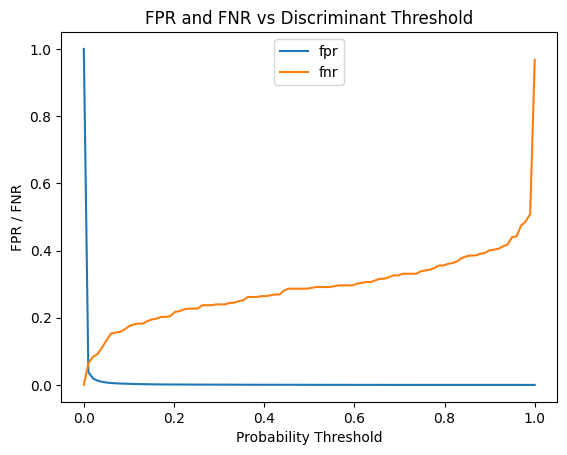

In [18]:
metrics.plot()
plt.xlabel('Probability Threshold')
plt.ylabel('FPR / FNR')
plt.title('FPR and FNR vs Discriminant Threshold')